In [31]:
import pandas as pd

import scipy.io
import scipy.sparse

dirpath = "./.data/filtered_gene_bc_matrices/hg19/"

In [32]:
dfg = pd.read_csv(dirpath + "genes.tsv", sep="\t", header=None)
dfc = pd.read_csv(dirpath + "barcodes.tsv", sep="\t", header=None)


### Genes/Features File

The `genes.tsv` file contains a row for each feature found within the mtx matrix at least 2 columns.  
The first column is the `feature's ID` and the second column contains the `feature's name`. A third column pay express the type of feature, such as gene experssion, antibody, CRISPR, or other. 


In [64]:
print(dfg)
print(dfg[0].value_counts())

                     0             1
0      ENSG00000243485    MIR1302-10
1      ENSG00000237613       FAM138A
2      ENSG00000186092         OR4F5
3      ENSG00000238009  RP11-34P13.7
4      ENSG00000239945  RP11-34P13.8
...                ...           ...
32733  ENSG00000215635    AC145205.1
32734  ENSG00000268590         BAGE5
32735  ENSG00000251180    CU459201.1
32736  ENSG00000215616    AC002321.2
32737  ENSG00000215611    AC002321.1

[32738 rows x 2 columns]
ENSG00000243485    1
ENSG00000232977    1
ENSG00000205850    1
ENSG00000240868    1
ENSG00000240654    1
                  ..
ENSG00000237686    1
ENSG00000223469    1
ENSG00000272114    1
ENSG00000112715    1
ENSG00000215611    1
Name: 0, Length: 32738, dtype: int64


### Barcodes File

The `barcodes.tsv` file contains a row for each column of the mtx matrix. Barcodes have a suffix indicates a GEM well (normally the suffix is "-1" indicated all came from a single GEM chip channel.)

When mRNA is transcribed from a gene it produces "transcriptomes" which are the values in the file. The values within the matrix are the number of each transcriptomes observed, per cell. Nearly every cell contains the same genes, but different cells show different patterns of gene expressions which are responsible for many different properties and behaviours of cells. 

See https://www.genome.gov/about-genomics/fact-sheets/Transcriptome-Fact-Sheet


In [65]:
print(dfc)

                     0
0     AAACATACAACCAC-1
1     AAACATTGAGCTAC-1
2     AAACATTGATCAGC-1
3     AAACCGTGCTTCCG-1
4     AAACCGTGTATGCG-1
...                ...
2695  TTTCGAACTCTCAT-1
2696  TTTCTACTGAGGCA-1
2697  TTTCTACTTCCTCG-1
2698  TTTGCATGAGAGGC-1
2699  TTTGCATGCCTCAC-1

[2700 rows x 1 columns]



https://broadinstitute.github.io/wot/file_formats/#:~:text=5.0-,MTX,row%20and%20column%20indices%2C%20respectively.  
Rows are genes and headers columns are barcode. These files correspond to rows and column indices respectively.

In [33]:
# Load mtx file into dataframe
# https://gist.github.com/Puriney/98544b779bcb815926f7acf87f537e61
# 1) Read
coo_mat = scipy.io.mmread(f"{dirpath}matrix.mtx")
print(coo_mat)
coo_mat


  (32708, 0)	4.0
  (32706, 0)	1.0
  (32705, 0)	10.0
  (32703, 0)	1.0
  (32702, 0)	5.0
  (32701, 0)	6.0
  (32699, 0)	10.0
  (32698, 0)	25.0
  (32697, 0)	3.0
  (32696, 0)	8.0
  (32526, 0)	1.0
  (32495, 0)	1.0
  (32398, 0)	1.0
  (32345, 0)	1.0
  (32323, 0)	1.0
  (32208, 0)	1.0
  (32128, 0)	1.0
  (32105, 0)	1.0
  (32092, 0)	1.0
  (32067, 0)	1.0
  (32044, 0)	1.0
  (32022, 0)	25.0
  (32016, 0)	1.0
  (31997, 0)	1.0
  (31991, 0)	2.0
  :	:
  (1201, 2699)	1.0
  (1184, 2699)	1.0
  (1109, 2699)	7.0
  (1010, 2699)	1.0
  (924, 2699)	2.0
  (908, 2699)	9.0
  (859, 2699)	2.0
  (756, 2699)	1.0
  (709, 2699)	1.0
  (687, 2699)	1.0
  (686, 2699)	1.0
  (678, 2699)	2.0
  (588, 2699)	1.0
  (558, 2699)	3.0
  (517, 2699)	1.0
  (492, 2699)	19.0
  (464, 2699)	1.0
  (457, 2699)	1.0
  (415, 2699)	2.0
  (412, 2699)	2.0
  (178, 2699)	2.0
  (166, 2699)	4.0
  (121, 2699)	1.0
  (120, 2699)	1.0
  (81, 2699)	1.0


<32738x2700 sparse matrix of type '<class 'numpy.float64'>'
	with 2286884 stored elements in COOrdinate format>

In [24]:
csc_mat = coo_mat.tocsc()
print("Compressed sparse column:")
print(csc_mat)
csc_mat


Compressed sparse column:
  (70, 0)	1.0
  (166, 0)	1.0
  (178, 0)	2.0
  (326, 0)	1.0
  (363, 0)	1.0
  (410, 0)	1.0
  (412, 0)	1.0
  (492, 0)	41.0
  (494, 0)	1.0
  (495, 0)	1.0
  (496, 0)	1.0
  (525, 0)	1.0
  (556, 0)	2.0
  (558, 0)	6.0
  (671, 0)	1.0
  (684, 0)	1.0
  (735, 0)	1.0
  (770, 0)	1.0
  (793, 0)	1.0
  (820, 0)	1.0
  (859, 0)	2.0
  (871, 0)	1.0
  (908, 0)	15.0
  (926, 0)	1.0
  (941, 0)	1.0
  :	:
  (31849, 2699)	1.0
  (31855, 2699)	1.0
  (31887, 2699)	1.0
  (31949, 2699)	2.0
  (31970, 2699)	2.0
  (32022, 2699)	17.0
  (32044, 2699)	1.0
  (32047, 2699)	2.0
  (32059, 2699)	1.0
  (32065, 2699)	1.0
  (32066, 2699)	1.0
  (32082, 2699)	1.0
  (32186, 2699)	1.0
  (32193, 2699)	1.0
  (32322, 2699)	1.0
  (32442, 2699)	1.0
  (32543, 2699)	1.0
  (32581, 2699)	1.0
  (32641, 2699)	1.0
  (32696, 2699)	3.0
  (32697, 2699)	1.0
  (32698, 2699)	7.0
  (32702, 2699)	1.0
  (32705, 2699)	1.0
  (32708, 2699)	3.0


<32738x2700 sparse matrix of type '<class 'numpy.float64'>'
	with 2286884 stored elements in Compressed Sparse Column format>

In [27]:

print("Compressed sparse row:")
csr_mat = coo_mat.tocsr(copy=True)
print(csr_mat)
csr_mat

Compressed sparse row:
  (5, 444)	1.0
  (5, 1017)	1.0
  (5, 1106)	1.0
  (5, 1161)	1.0
  (5, 1359)	1.0
  (5, 1434)	1.0
  (5, 1628)	1.0
  (5, 1798)	1.0
  (5, 1812)	1.0
  (8, 2176)	1.0
  (8, 2470)	1.0
  (8, 2539)	1.0
  (22, 593)	1.0
  (22, 1931)	1.0
  (22, 1934)	1.0
  (22, 2269)	1.0
  (22, 2405)	1.0
  (23, 194)	1.0
  (23, 1090)	1.0
  (23, 1233)	1.0
  (25, 53)	1.0
  (25, 1255)	1.0
  (26, 105)	1.0
  (26, 417)	1.0
  (26, 456)	1.0
  :	:
  (32732, 1761)	1.0
  (32732, 1825)	1.0
  (32732, 1937)	1.0
  (32732, 2038)	1.0
  (32732, 2080)	1.0
  (32732, 2122)	1.0
  (32732, 2178)	1.0
  (32732, 2226)	1.0
  (32732, 2242)	1.0
  (32732, 2246)	1.0
  (32732, 2262)	1.0
  (32732, 2312)	1.0
  (32732, 2313)	1.0
  (32732, 2334)	1.0
  (32732, 2374)	2.0
  (32732, 2383)	1.0
  (32732, 2419)	1.0
  (32732, 2443)	1.0
  (32732, 2527)	1.0
  (32732, 2588)	1.0
  (32732, 2610)	1.0
  (32732, 2655)	1.0
  (32732, 2659)	1.0
  (32732, 2687)	1.0
  (32732, 2693)	1.0


<32738x2700 sparse matrix of type '<class 'numpy.float64'>'
	with 2286884 stored elements in Compressed Sparse Row format>

In [34]:
sp_df = pd.DataFrame(csr_mat.todense())#.fillna(0)
print(sp_df)

       0     1     2     3     4     5     6     7     8     9     ...  2690  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
32733   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
32734   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
32735   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
32736   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
32737   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       2691  2692  2693  2694  2695  26

In [35]:
sp_df = pd.DataFrame(csr_mat.todense()).fillna(0)
print(sp_df)


       0     1     2     3     4     5     6     7     8     9     ...  2690  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
32733   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
32734   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
32735   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
32736   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
32737   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       2691  2692  2693  2694  2695  26

In [68]:
sp_df.sum().describe()

count     2700.000000
mean      2366.900370
std       1094.262076
min        548.000000
25%       1757.750000
50%       2197.000000
75%       2763.000000
max      15844.000000
dtype: float64

<AxesSubplot:>

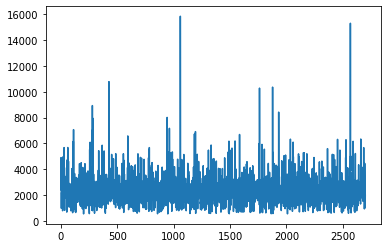

In [70]:
sp_df.sum().plot()